In [10]:
import org.jetbrains.kotlinx.dl.api.summary.printSummary
import org.jetbrains.kotlinx.dl.impl.preprocessing.image.ImageConverter
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModelHub
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModels
import java.io.File
import javax.imageio.ImageIO

In [11]:
val modelHub = ONNXModelHub(cacheDirectory = File("../../../cache/pretrainedModels"))
val detectionModel = ONNXModels.ObjectDetection.EfficientDetD2.pretrainedModel(modelHub)

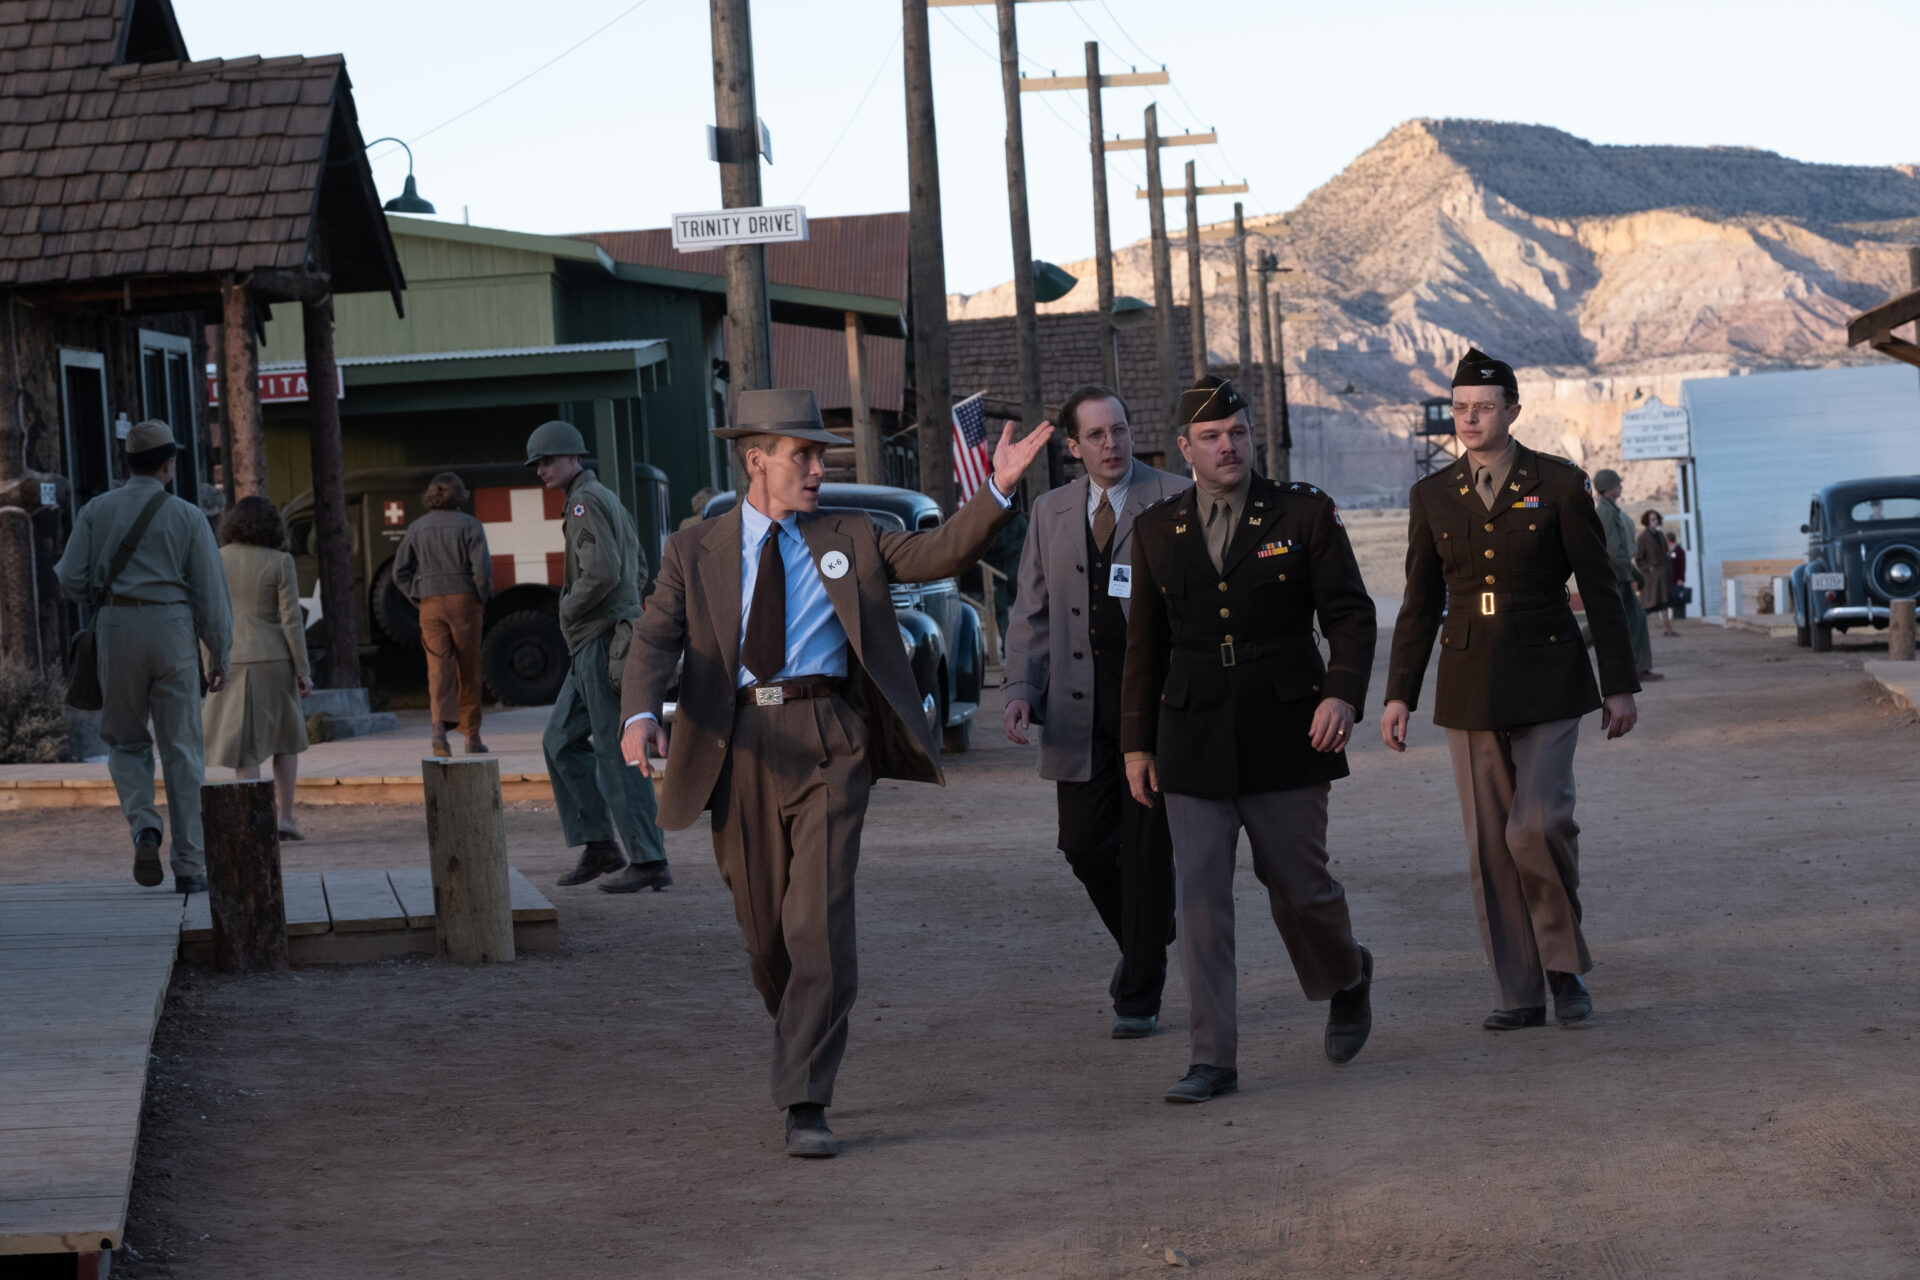

In [12]:
import javax.imageio.ImageIO

val PATH_TO_IMAGE = "../src/main/resources/oppenheimer.png"
val image = ImageIO.read(File(PATH_TO_IMAGE))

DISPLAY(image)

In [13]:
val detectedObjects = detectionModel.detectObjects(image, topK = 20)

detectedObjects.forEach {
    println("Found ${it.label} with probability ${it.probability}")
}

detectionModel.close()

Found person with probability 0.889277
Found person with probability 0.79978573
Found person with probability 0.6827547
Found person with probability 0.65652275
Found person with probability 0.58219755
Found truck with probability 0.5559009
Found person with probability 0.5001714
Found handbag with probability 0.4915516
Found person with probability 0.45036766
Found person with probability 0.42939186


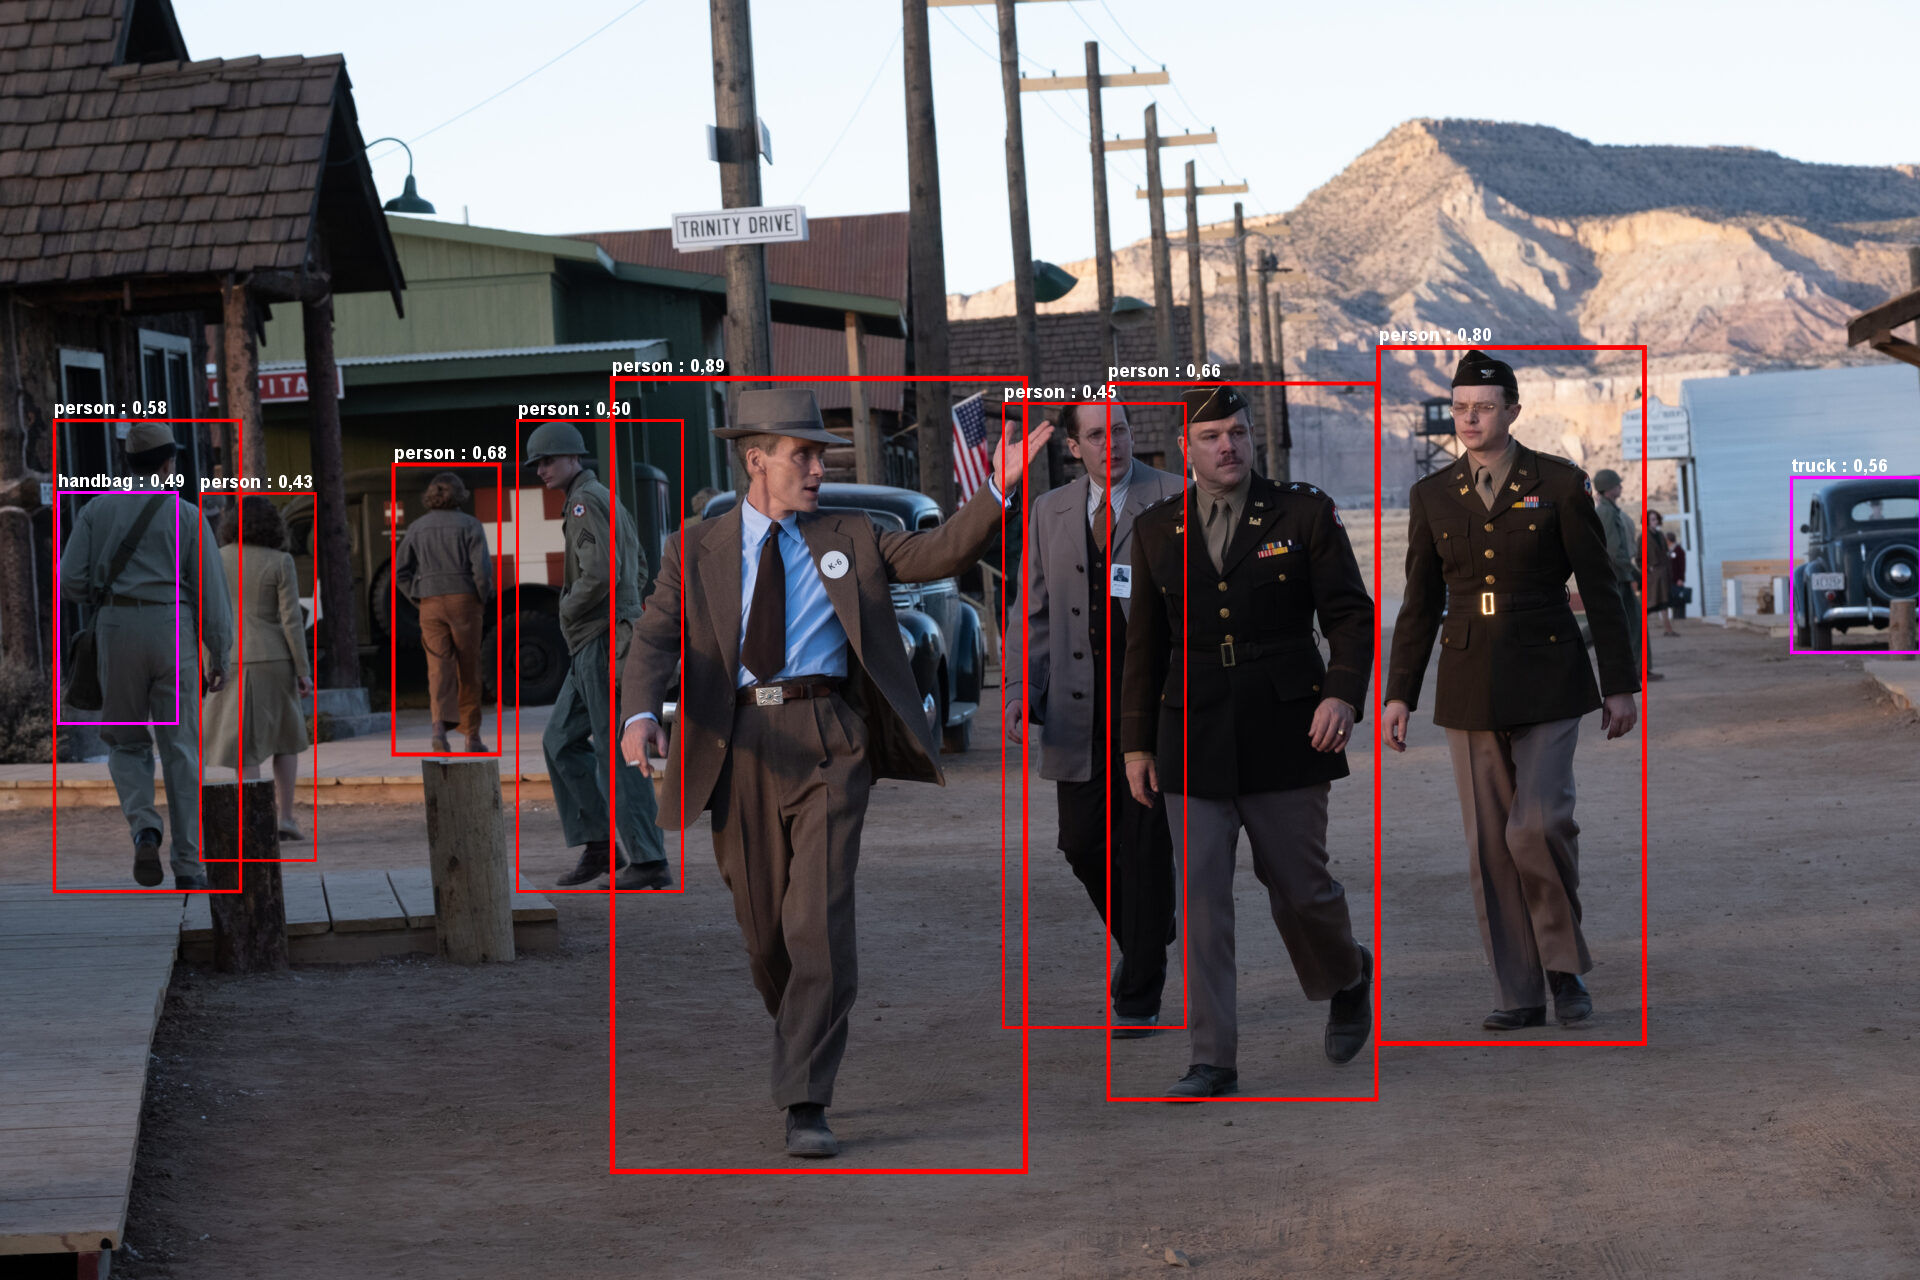

In [14]:
val streetImageWithRectangles = drawRectanglesForDetectedObjects(image, detectedObjects)
DISPLAY(streetImageWithRectangles)